<a href="https://colab.research.google.com/github/yudintsev-sergey/Neyro/blob/main/Adult_Sound_gidro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отключаем возможность использования GPU

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    #

Импортируем библиотеки

In [ ]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow import keras
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Монтируем диск

In [ ]:
from google.colab import drive
drive.mount("/ShardDrives/")

Mounted at /ShardDrives/


Меняем директорию

In [ ]:
os.chdir('/ShardDrives/MyDrive/Colab Notebooks/Try/')

Засекаем время

In [ ]:
start = time.time()

Из библиотеки google.colab импортируем класс files



In [ ]:
from google.colab import files

Создаем объект этого класса, применяя метод .upload(). Загружаем по предложенной кнопке

In [ ]:
uploaded = files.upload()

Saving tmbr_base.npy to tmbr_base (1).npy
Saving true_base.npy to true_base (1).npy


Читаем файлы для обучения нейронной сети

In [ ]:
tmbr_base = np.load('tmbr_base.npy')
true_base = np.load('true_base.npy')

Делим общую базу на обучающую и тестовую часть

In [ ]:
n = ma.ceil(tmbr_base.shape[0] * 0.8)       # 9328
m = tmbr_base.shape[0] - n                  # 2331
tmbr_train = tmbr_base[:n]
tmbr_test = tmbr_base[n:]
true_train = true_base[:n]
true_test = true_base[n:]

Строим модель

In [ ]:
model = keras.Sequential([
    Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(16, 16, 1)),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3,  activation='softmax')
])

Выводим структуру модели

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 66131 (258.32 KB)
Trainable params: 66131 (258.32 KB)
Non-trainable params: 0 (0.00 Byte)
________________

Компилируем модель

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
print("Компиляция завершена")

Компиляция завершена


Обучаем

In [ ]:
history = model.fit(tmbr_train, true_train, batch_size=128, epochs=50, validation_split=0.2, verbose = 0)

Визуализируем

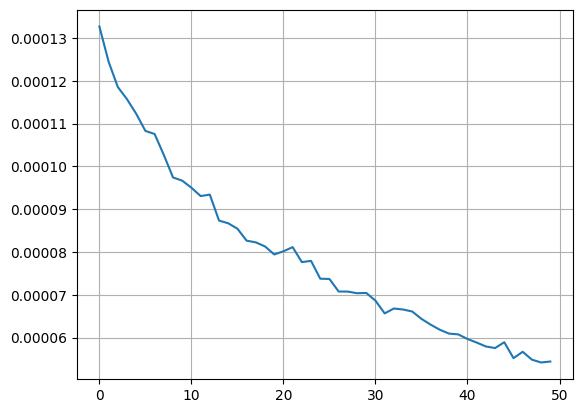

In [ ]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

Оцениваем

In [ ]:
results = model.evaluate(tmbr_test, true_test, batch_size=128)
print("test loss, test acc:", results)

6/6 [==============================] - 0s 10ms/step - loss: 0.1202 - accuracy: 0.9851
test loss, test acc: [0.1201755627989769, 0.9851190447807312]


Время работы алгоритма

In [ ]:
end = time.time()
print("Время работы алгоритма составило :", (end-start), "сек")

Время работы алгоритма составило : 539.9079546928406 сек
